<a href="https://colab.research.google.com/github/gapself/machine-learning-projects/blob/main/data-analysis/exc_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie 7

Zbiór: London_merged
<br>
Zbiór danych dotyczy bike-sharingu w Londynie.<br>

# 1. Przeprowadź regresję liniową, w której zmienną zależną jest kolumna cnt (wyłącz z analiz pierwszą kolumnę).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as r_coef
import numpy as np

path = 'london_merged_7w.csv'
df = pd.read_csv(path, sep=',')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
data_notime = df.drop(labels=['timestamp'],axis=1)
data_notime
X = data_notime.drop(labels=['cnt'],axis=1)
Y = data_notime['cnt']
model = LinearRegression()
model.fit(X,Y)
model.coef_
# # #predict and evaluate
prediction = model.predict(X)
#predict and evaluate
coefficients = [round(x,3) for x in model.coef_]
named_coef = list(zip(data_notime.keys(),coefficients))
named_coef.sort(reverse=True,key = lambda x : x[1])
r_coef(prediction,Y) # (0.5521667326219122, 0.0)

(0.5180801615832425, 0.0)

# 2. Z kolumny time stamp stwórz kolumnę hour oraz year<br>

In [ ]:
year_list=[]
hour_list=[]
for row in df['timestamp']:
    year = row.split("-")[0]
    hour = row.split("-")[2].split(" ")[1].split(":")[0]
    if hour[0]=='0':
        hour_list.append(hour[1])
    else:
        hour_list.append(hour)
    year_list.append(year)
#     print(hour)
data_notime['year']=year_list
data_notime['hour']=hour_list
data_notime.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,4


# 3. Wskaż, które parametry regresji są istotne na poziomie istotności 0,05

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y,X) #zmienna zależna, współ
results = model.fit()
#print(results.params)
p = results.pvalues
#Get params significant at 0.05 p-value
print(p)
p[p<=0.05]

const           0.000000e+00
t1              2.842620e-13
t2              1.922529e-02
hum             0.000000e+00
wind_speed      1.867415e-04
weather_code    6.381311e-03
is_holiday      4.446235e-08
is_weekend      6.296503e-41
season          6.821574e-18
dtype: float64


const           0.000000e+00
t1              2.842620e-13
t2              1.922529e-02
hum             0.000000e+00
wind_speed      1.867415e-04
weather_code    6.381311e-03
is_holiday      4.446235e-08
is_weekend      6.296503e-41
season          6.821574e-18
dtype: float64

# 4. Przedstaw korelacje między wszystkimi zmiennymi za pomocą heatmapy.<br>


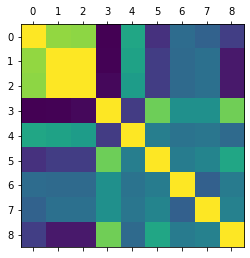

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,4


In [ ]:
corrMatrix = data_notime.corr()
plt.matshow(corrMatrix.corr())
plt.show()
data_notime.head()


# 5. Podziel dane ze względu na rok, przeprowadź dla każdego z lat osobną analizę regresyjną.

In [ ]:
unique_values = data_notime["year"].unique() # ==> array(['2015', '2016', '2017'], dtype=object)
data_2015 = data_notime[data_notime["year"]=="2015"]
data_2016 = data_notime[data_notime["year"]=="2016"]
data_2017 = data_notime[data_notime["year"]=="2017"]
# data_2015.head()

In [ ]:
X_2015 = data_2015.drop(labels=['cnt'],axis=1)
Y_2015 = data_2015['cnt']
model = LinearRegression()
model.fit(X_2015,Y_2015)
model.coef_
# # #predict and evaluate
prediction = model.predict(X_2015)
#predict and evaluate
coefficients = [round(x,3) for x in model.coef_]
named_coef = list(zip(data_notime.keys(),coefficients))
named_coef.sort(reverse=True,key = lambda x : x[1])
r_coef(prediction,Y_2015)

(0.5523455324592398, 0.0)

In [ ]:
X_2016 = data_2016.drop(labels=['cnt'],axis=1)
Y_2016 = data_2016['cnt']
model = LinearRegression()
model.fit(X_2016,Y_2016)
model.coef_
# # #predict and evaluate
prediction = model.predict(X_2016)
#predict and evaluate
coefficients = [round(x,3) for x in model.coef_]
named_coef = list(zip(data_notime.keys(),coefficients))
named_coef.sort(reverse=True,key = lambda x : x[1])
r_coef(prediction,Y_2016)

(0.551658356531781, 0.0)

In [ ]:
X_2017 = data_2017.drop(labels=['cnt'],axis=1)
Y_2017 = data_2017['cnt']
model = LinearRegression()
model.fit(X_2017,Y_2017)
model.coef_
# # #predict and evaluate
prediction = model.predict(X_2017)
#predict and evaluate
coefficients = [round(x,3) for x in model.coef_]
named_coef = list(zip(data_notime.keys(),coefficients))
named_coef.sort(reverse=True,key = lambda x : x[1])
r_coef(prediction,Y_2017)

(0.5957160147959107, 3.387759022435472e-08)